# Visualizations in R

Author: Sandra Silva
Date: 13/07/2020 \
Version: 0.3 \

In [1]:
library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(vegan)
library("factoextra")
library(RColorBrewer)
library("FactoMineR")

Loading required package: grid

ComplexHeatmap version 2.5.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.10
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


── Attaching packages ─────────────────────────────────────── t

The ComplexHeatmap package is inspired from the pheatmap package. You can find many arguments in ComplexHeatmap have the same names as in pheatmap. 
https://jokergoo.github.io/ComplexHeatmap-reference/book/

In [7]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)}

# Load data

In [4]:
dataPA <- read.csv("/home/gomes/silva2/5_Visualization/Mean_FS_byOrigin_flavo/Cazyme_PA_wt_metadata_origin_flavo_mean_Origin.csv", header=T, row.names="Origin")#, row.names="Genus")
data_matrixPA <- dataPA[ , !names(dataPA) %in% c("orfs", "index","Origin","Genus", "Family", "Genome")]
data_matrixPA <- as.matrix(data_matrixPA)
data_matrix_transposePA <- t(data_matrixPA)
data_matrix_transposePA <- as.matrix(data_matrix_transposePA)
#head(data_matrix_transpose)
#data_hellinger <- decostand(data_matrix, method="hellinger")

head(data_matrixPA)

,GH25,GH13_8,GH74,GH19,PL7_5,GT30,GT51,CBM38,CBM6.GH81,CBM5.GH19,CBM51.GH27,CBM77.CE8.PL1,CBM16.GH29,PL9.CBM22,CBM10.CBM2.GH5_4,CBM47.CBM47,CBM48.CE1,GH30_5,GT22,GH78.3.2.1.40
Marine,0.09660574,0.001305483,0.25065274,0.03785901,0.15143603,0.8629243,0.9543081,0.03394256,0.06266319,0.02349869,0.003916449,0.00000000,0.00000000,0.01697128,0.00000000,0.01305483,0.00000000,0.009138381,0.007832898,0.005221932
Non_marine,0.60824742,0.088659794,0.07216495,0.15876289,0.03298969,0.9690722,1.0000000,0.00000000,0.01443299,0.00000000,0.030927835,0.01649485,0.01443299,0.00000000,0.01237113,0.00000000,0.01030928,0.000000000,0.000000000,0.000000000


## PA

In [25]:
#pdf("heatmap_cazymes.pdf",onefile = T) # width = 8, height = 8,

svg(file="filename2.svg")

#largura, altura:
fig(8, 8)
set.seed(40)

colnames(data_matrix_transposePA) <- c("Marine", "Not Marine")

library("RColorBrewer")
display.brewer.all(colorblindFriendly = TRUE)
#mycol <- colorRampPalette(brewer.pal(10, "RdYlBu"))(256)
mycol <- colorRampPalette(brewer.pal(9, "YlOrRd"))(20)

hmap <- Heatmap(as.matrix(data_matrix_transposePA),
                name = "Mean Presence per Origin",
                col = mycol,
                border=TRUE,
    rect_gp = gpar(col = "white", lwd = 0.2),
                
    heatmap_width = unit(9, "cm"), 
    heatmap_height = unit(9, "cm"),
    
    use_raster = TRUE, 
    raster_device = "png",   
    #raster_by_magick = TRUE,

    row_km = 4, row_km_repeats = 100,
    column_km = 1, column_km_repeats = 100,
                               
   # column_title = "Origin", 
    #column_title_side = "top",  
    #column_title_gp=gpar(fontsize = 8, fontface = "bold"),
    
    column_names_rot = 1,
    column_names_side="top",
    column_names_gp = gpar(fontsize = 8, fontface="bold"), 
    column_names_centered = TRUE,
                
    row_title = "CAZymes", 
    row_title_side="left",
    row_title_gp=gpar(fontsize = 8, fontface = "bold"),                  
    
    row_names_gp = gpar(fontsize = 6),
    
    show_row_names = TRUE,
    show_column_names = TRUE,
                
    cluster_rows = TRUE,
    cluster_columns = TRUE, show_column_dend = FALSE, 
    
    heatmap_legend_param = list(title_gp = gpar(fontsize = 8, fontface = "bold" ), labels_gp = gpar(fontsize = 8),
                                direction = "horizontal", legend_width = unit(3.5, "cm"), labels = c("0%", "50%", "100%"))
                               ) 

draw(hmap,  heatmap_legend_side = "bottom") # merge_legend = FALSE, heatmap_legend_side = "bottom", annotation_legend_side = "right"

dev.off()

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

In [ ]:
unique(metadata[, c("Clan", "Clan_Name")])

## Counts

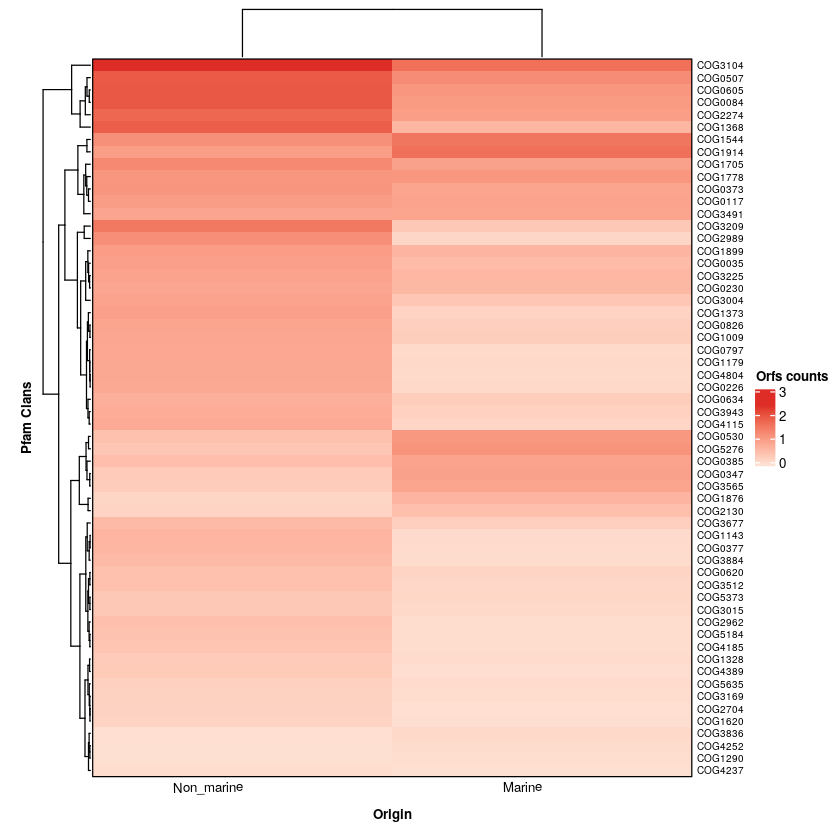

In [13]:
set.seed(40)

#pdf("kegg_mean.pdf", width = 8, height = 8)

library("RColorBrewer")
mycol <- colorRampPalette(brewer.pal(3, "Reds"))(2)
#enhancer_col_fun = colorRamp2(c(0, 0.5, 1), c("white", "yellow","red"))

hmap <- Heatmap(as.matrix(data_matrix_transpose),
                name = "Orfs counts",
                col = mycol,
                border=TRUE,
                
    #use_raster = TRUE, 
    #raster_device = "png",   
                
    #width = unit(13, "cm"), 
    #height = unit(18, "cm"),
    #heatmap_width = unit(23, "cm"), 
    #heatmap_height = unit(15, "cm"),

    #row_km = 9, row_km_repeats = 100,
    column_km = 1, column_km_repeats = 100,
                               
    column_title = "Origin", column_title_side = "bottom",  
    column_title_gp=gpar(fontsize = 8, fontface = "bold"),
    column_names_rot = 1,
                
    row_title = "Pfam Clans", row_title_side="left",
    row_title_gp=gpar(fontsize = 8, fontface = "bold"),
                       
    row_names_gp = gpar(fontsize = 6),
    column_names_gp = gpar(fontsize = 8),
    show_row_names = TRUE,
    show_column_names = TRUE,
                
    cluster_rows = TRUE,
    cluster_columns = TRUE,           
               
    heatmap_legend_param = list(title_gp = gpar(fontsize = 8, fontface = "bold" ), labels_gp = gpar(fontsize = 8))
)


hmap = draw(hmap) 

#dev.off()

## Relative abundance

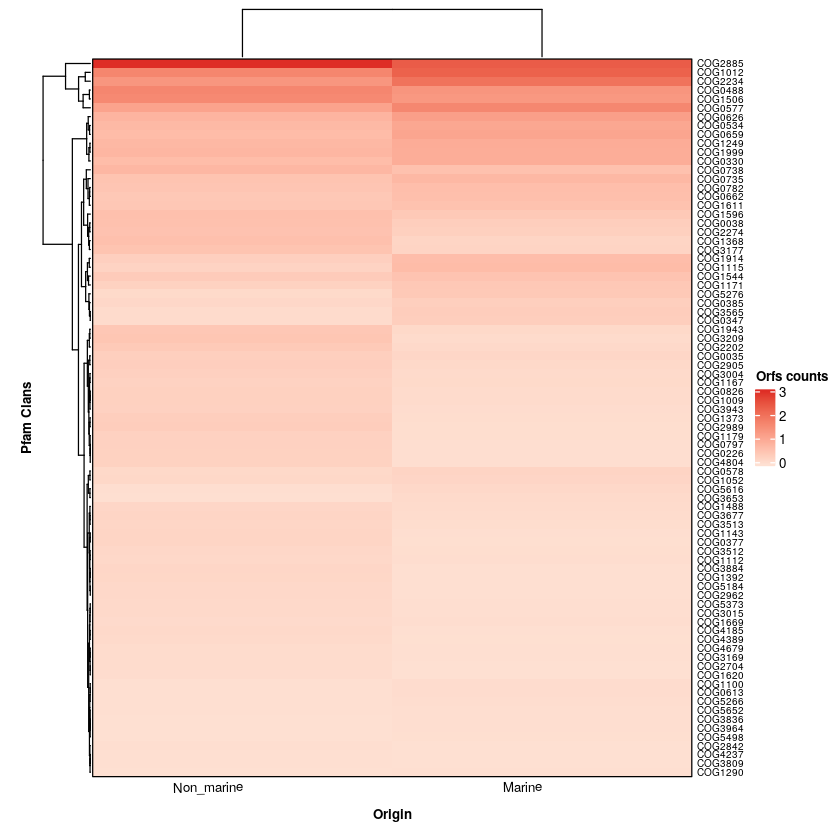

In [14]:
set.seed(40)

#pdf("kegg_mean.pdf", width = 8, height = 8)

library("RColorBrewer")
mycol <- colorRampPalette(brewer.pal(3, "Reds"))(2)
#enhancer_col_fun = colorRamp2(c(0, 0.5, 1), c("white", "yellow","red"))

hmap <- Heatmap(as.matrix(data_matrix_transposeRelA),
                name = "Orfs counts",
                col = mycol,
                border=TRUE,
                
    #use_raster = TRUE, 
    #raster_device = "png",   
                
    #width = unit(13, "cm"), 
    #height = unit(18, "cm"),
    #heatmap_width = unit(23, "cm"), 
    #heatmap_height = unit(15, "cm"),

    #row_km = 9, row_km_repeats = 100,
    column_km = 1, column_km_repeats = 100,
                               
    column_title = "Origin", column_title_side = "bottom",  
    column_title_gp=gpar(fontsize = 8, fontface = "bold"),
    column_names_rot = 1,
                
    row_title = "Pfam Clans", row_title_side="left",
    row_title_gp=gpar(fontsize = 8, fontface = "bold"),
                       
    row_names_gp = gpar(fontsize = 6),
    column_names_gp = gpar(fontsize = 8),
    show_row_names = TRUE,
    show_column_names = TRUE,
                
    cluster_rows = TRUE,
    cluster_columns = TRUE,           
               
    heatmap_legend_param = list(title_gp = gpar(fontsize = 8, fontface = "bold" ), labels_gp = gpar(fontsize = 8))
)


hmap = draw(hmap) 

#dev.off()

# Permanova

In [ ]:
# PerMANOVA - partitioning the euclidean distance matrix by ORIGIN
data2 <- data
data2$Origin <- rownames(data2)
adonis(data_matrix ~ Origin, data = data2, method='eu')

In [ ]:
# PerMANOVA - partitioning the euclidean distance matrix by ORIGIN
data2PA <- dataPA
data2PA$Origin <- rownames(data2PA)
adonis(data_matrixPA ~ Origin, data = data2PA, method='eu')

In [ ]:
# PerMANOVA - partitioning the euclidean distance matrix by ORIGIN
data2RelA <- dataRelA
data2RelA$Origin <- rownames(data2RelA)
adonis(data_matrixRelA ~ Origin, data = data2RelA, method='eu')